___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("police.csv")

C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df.drop(['county_name','state'], axis=1, inplace=True)

In [11]:
df = df.dropna(subset=['driver_gender'])

In [12]:
df["is_arrested"] = df["is_arrested"].astype('bool')

In [13]:
df["stop_date"]+ " "+df["stop_time"]

0         2005-01-02 01:55
1         2005-01-02 20:30
3         2005-01-04 12:55
4         2005-01-06 01:30
5         2005-01-12 08:05
                ...       
509666    2015-12-31 22:46
509667    2015-12-31 22:47
509668    2015-12-31 23:08
509669    2015-12-31 23:44
509670    2015-12-31 23:48
Length: 480584, dtype: object

In [14]:
pd.to_datetime(df["stop_date"]+ " "+df["stop_time"])

0        2005-01-02 01:55:00
1        2005-01-02 20:30:00
3        2005-01-04 12:55:00
4        2005-01-06 01:30:00
5        2005-01-12 08:05:00
                 ...        
509666   2015-12-31 22:46:00
509667   2015-12-31 22:47:00
509668   2015-12-31 23:08:00
509669   2015-12-31 23:44:00
509670   2015-12-31 23:48:00
Length: 480584, dtype: datetime64[ns]

In [15]:
df["stop_datetime"] = pd.to_datetime(df["stop_date"]+ " "+df["stop_time"])

In [16]:
df = df.set_index("stop_datetime")

In [17]:
df.head()

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,27.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,32.0,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [18]:
df["is_arrested"].value_counts()

False    463981
True      16603
Name: is_arrested, dtype: int64

In [19]:
df["is_arrested"].count()

480584

In [20]:
arrest_num = df[df["is_arrested"] == True]["is_arrested"].count()
arrest_num

16603

In [21]:
not_arrest_num = df[df["is_arrested"] == False]["is_arrested"].count()
not_arrest_num

463981

In [22]:
arrested_rate = (arrest_num/not_arrest_num)*100
arrested_rate

3.5783792870828766

In [23]:
df["is_arrested"].mean()

0.03454755048024903

In [24]:
arrested_data = df[df["is_arrested"] == True]
arrested_data.head()

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-02-20 17:15:00,RI-2005-00015,2005-02-20,17:15,Zone X1,NaN,NaN,0,M,1986.0,19.0,...,False,NaN,NaN,False,Arrest Driver,True,16-30 Min,True,False,Zone X1
2005-06-18 16:30:00,RI-2005-00037,2005-06-18,16:30,Zone X4,NaN,NaN,500,F,1964.0,41.0,...,False,NaN,NaN,False,Arrest Driver,True,30+ Min,False,False,Zone X4
2005-07-18 13:00:00,RI-2005-00051,2005-07-18,13:00,Zone X4,NaN,NaN,500,M,1949.0,56.0,...,False,NaN,NaN,False,Arrest Driver,True,30+ Min,False,False,Zone X4
2005-08-08 02:09:00,RI-2005-00073,2005-08-08,02:09,Zone X4,NaN,NaN,500,M,1955.0,50.0,...,False,NaN,NaN,False,Arrest Driver,True,30+ Min,False,False,Zone X4
2005-08-28 01:00:00,RI-2005-00084,2005-08-28,01:00,Zone X1,NaN,NaN,0,M,1979.0,26.0,...,True,"Incident to Arrest,Terry Frisk","Incident to Arrest,Protective Frisk",False,Arrest Driver,True,16-30 Min,True,False,Zone X1


***

In [18]:
arrested_data.groupby("stop_time")["stop_time"].count()

stop_time
00:00    60
00:01    24
00:02    29
00:03    17
00:04    15
         ..
23:55    40
23:56    16
23:57    21
23:58    16
23:59    14
Name: stop_time, Length: 1373, dtype: int64

In [25]:
def dividestr (x):
    return x.split()[0][0:2]

In [26]:
arrested_data["stop_time"].map(dividestr).sort_values()

stop_datetime
2011-09-02 00:05:00    00
2007-11-22 00:47:00    00
2014-05-15 00:49:00    00
2007-11-24 00:47:00    00
2006-02-26 00:35:00    00
                       ..
2006-08-19 23:44:00    23
2013-11-05 23:35:00    23
2009-06-30 23:05:00    23
2009-07-17 23:07:00    23
2012-07-27 23:41:00    23
Name: stop_time, Length: 16603, dtype: object

In [19]:
arrested_data["stop_time"]

stop_datetime
2005-02-20 17:15:00    17:15
2005-06-18 16:30:00    16:30
2005-07-18 13:00:00    13:00
2005-08-08 02:09:00    02:09
2005-08-28 01:00:00    01:00
                       ...  
2015-12-28 11:04:00    11:04
2015-12-28 14:25:00    14:25
2015-12-30 09:27:00    09:27
2015-12-30 13:15:00    13:15
2015-12-31 22:10:00    22:10
Name: stop_time, Length: 16603, dtype: object

In [20]:
len(arrested_data["stop_time"].unique())

1373

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


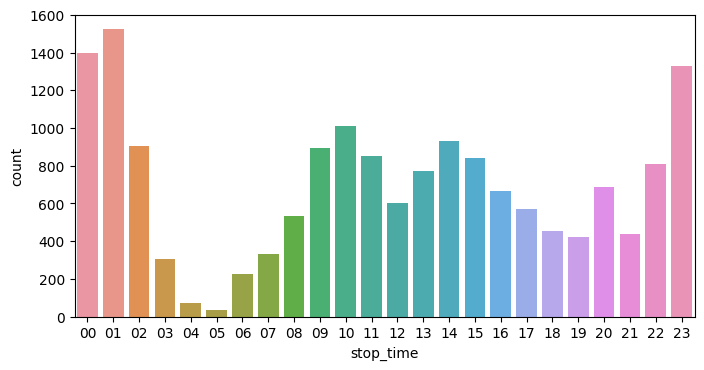

In [27]:
plt.figure(figsize=(8,4),dpi=100)
sns.countplot(arrested_data["stop_time"].map(dividestr).sort_values());

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [21]:
df["drugs_related_stop"].resample(rule="A").mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [22]:
annual_drug_rate = df["drugs_related_stop"]
annual_drug_rate

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
                       ...  
2015-12-31 22:46:00    False
2015-12-31 22:47:00    False
2015-12-31 23:08:00    False
2015-12-31 23:44:00    False
2015-12-31 23:48:00    False
Name: drugs_related_stop, Length: 480584, dtype: bool

In [23]:
len(df[df["drugs_related_stop"] == True])

4765

In [24]:
len(df[df["drugs_related_stop"] == False])

475819

In [25]:
(len(df[df["drugs_related_stop"] == True])/len(df[df["drugs_related_stop"] == False]))*100

1.0014312164919854

In [26]:
drug_rate = df[df["drugs_related_stop"] == True]
drug_rate.head()

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-24 20:32:00,RI-2005-00010,2005-01-24,20:32,Zone K1,NaN,NaN,600,M,1987.0,18.0,...,True,Probable Cause,Probable Cause,True,Citation,False,0-15 Min,True,True,Zone K1
2005-10-01 00:00:00,RI-2005-00165,2005-10-01,00:00,Zone K3,NaN,NaN,300,M,1988.0,17.0,...,True,Probable Cause,Probable Cause,True,Arrest Driver,True,16-30 Min,False,True,Zone K3
2005-10-01 00:00:00,RI-2005-00167,2005-10-01,00:00,Zone K1,NaN,NaN,600,M,1988.0,17.0,...,True,"Odor of Drugs/Alcohol,Probable Cause",Probable Cause,True,Citation,False,30+ Min,False,True,Zone K1
2005-10-01 00:00:00,RI-2005-00168,2005-10-01,00:00,Zone K1,NaN,NaN,600,M,1988.0,17.0,...,True,"Odor of Drugs/Alcohol,Probable Cause",Probable Cause,True,Citation,False,30+ Min,False,True,Zone K1
2005-10-03 15:40:00,RI-2005-00548,2005-10-03,15:40,Zone X4,NaN,NaN,500,M,1979.0,26.0,...,True,Incident to Arrest,Incident to Arrest,True,Arrest Driver,True,30+ Min,True,True,Zone X4


In [27]:
drug_rate["stop_date"] = pd.to_datetime(drug_rate["stop_date"])

<ipython-input-27-23e986921cc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_rate["stop_date"] = pd.to_datetime(drug_rate["stop_date"])


In [28]:
drug_rate["stop_date"].dt.year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)

In [29]:
drug_rate.groupby(drug_rate["stop_date"].dt.year)["drugs_related_stop"].count()

stop_date
2005    111
2006    368
2007    423
2008    344
2009    416
2010    400
2011    486
2012    596
2013    498
2014    644
2015    479
Name: drugs_related_stop, dtype: int64

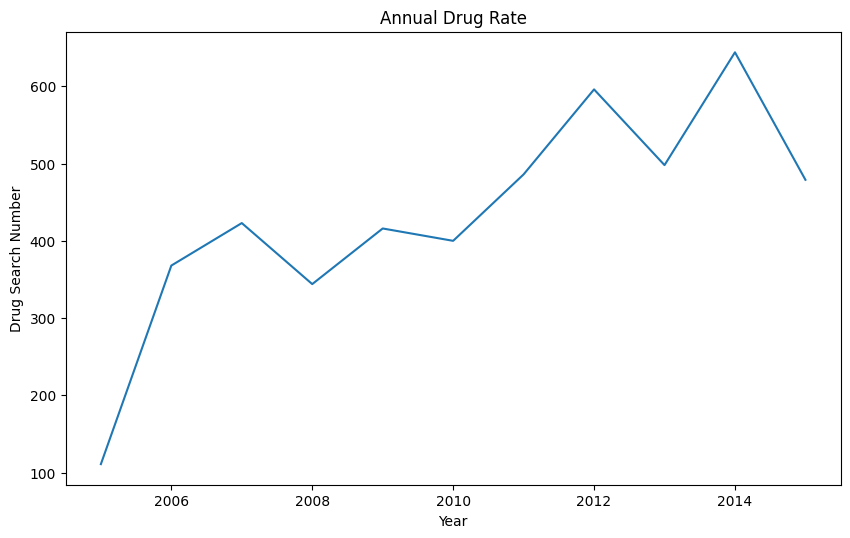

In [30]:
fig, axes = plt.subplots(figsize=(10,6), dpi=100)
axes.plot(drug_rate["stop_date"].dt.year.unique(),drug_rate.groupby(drug_rate["stop_date"].dt.year)["drugs_related_stop"].count())
axes.set_xlabel("Year")
axes.set_ylabel("Drug Search Number")
axes.set_title("Annual Drug Rate");

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [31]:
df["search_conducted"].value_counts()

False    462822
True      17762
Name: search_conducted, dtype: int64

In [32]:
annual_search_rate = df["search_conducted"]
annual_search_rate

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
                       ...  
2015-12-31 22:46:00    False
2015-12-31 22:47:00    False
2015-12-31 23:08:00    False
2015-12-31 23:44:00    False
2015-12-31 23:48:00    False
Name: search_conducted, Length: 480584, dtype: object

In [34]:
annual = pd.concat([annual_drug_rate,annual_search_rate], axis = 1)
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-01-02 01:55:00,False,False
2005-01-02 20:30:00,False,False
2005-01-04 12:55:00,False,False
2005-01-06 01:30:00,False,False
2005-01-12 08:05:00,False,False
...,...,...
2015-12-31 22:46:00,False,False
2015-12-31 22:47:00,False,False
2015-12-31 23:08:00,False,False


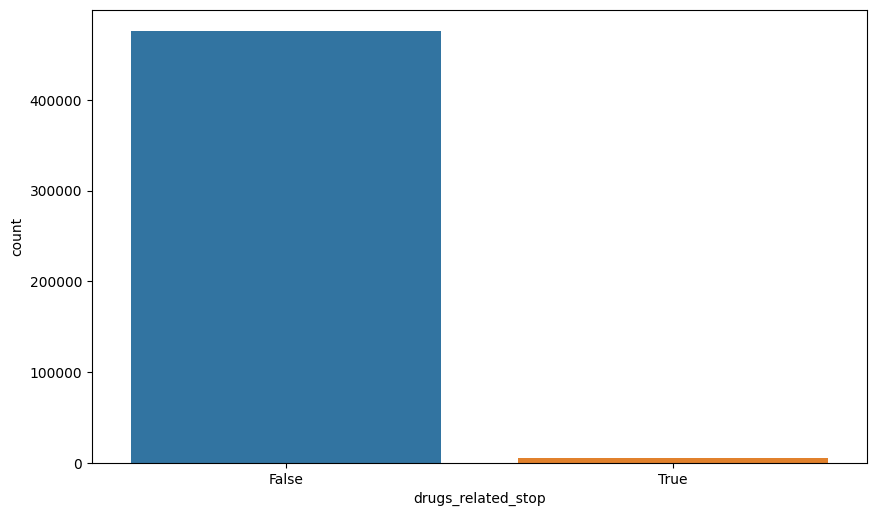

In [35]:
fig, axes = plt.subplots(figsize=(10,6),dpi=100)
sns.countplot(data=annual, x="drugs_related_stop");

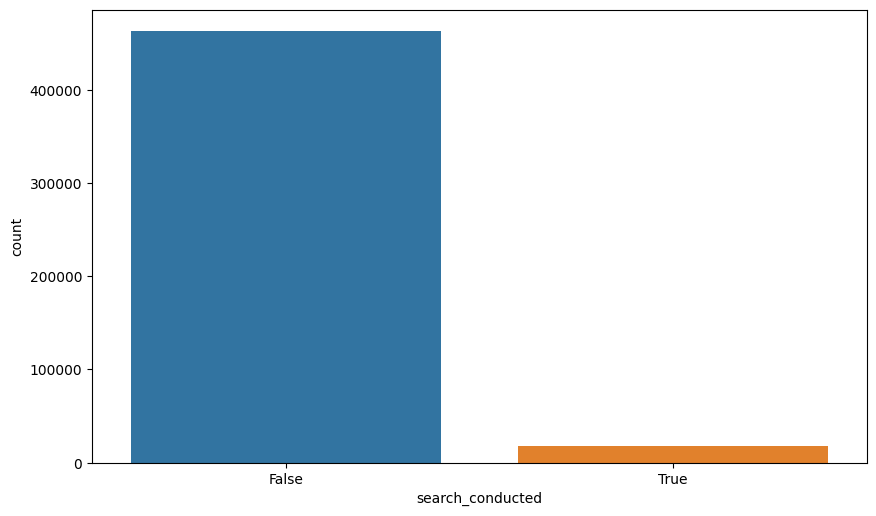

In [36]:
fig, axes = plt.subplots(figsize=(10,6),dpi=100)
sns.countplot(data=annual, x="search_conducted");

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [37]:
all_zones = pd.crosstab(df.district, df.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [38]:
k_zones = all_zones.loc["Zone K1":"Zone K3"]
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

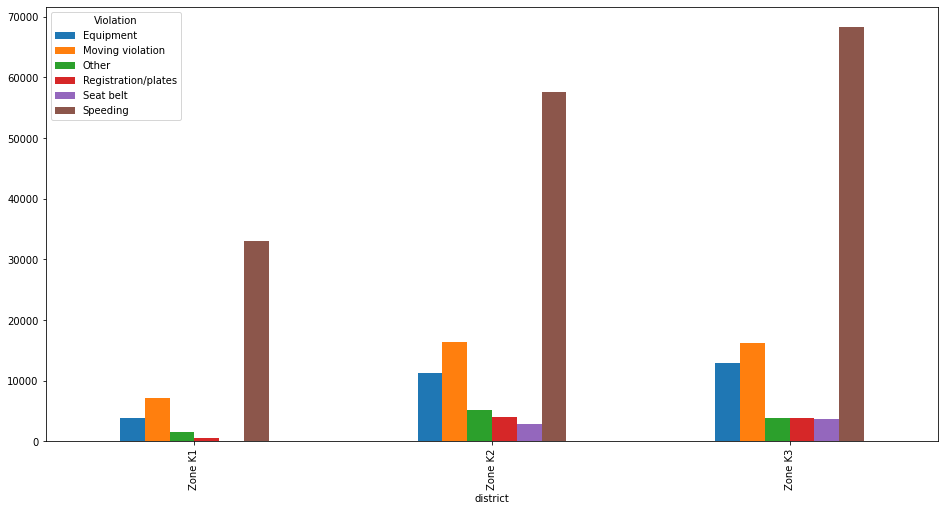

In [39]:
k_zones.plot.bar(figsize=(16,8))
plt.legend(title='Violation');

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

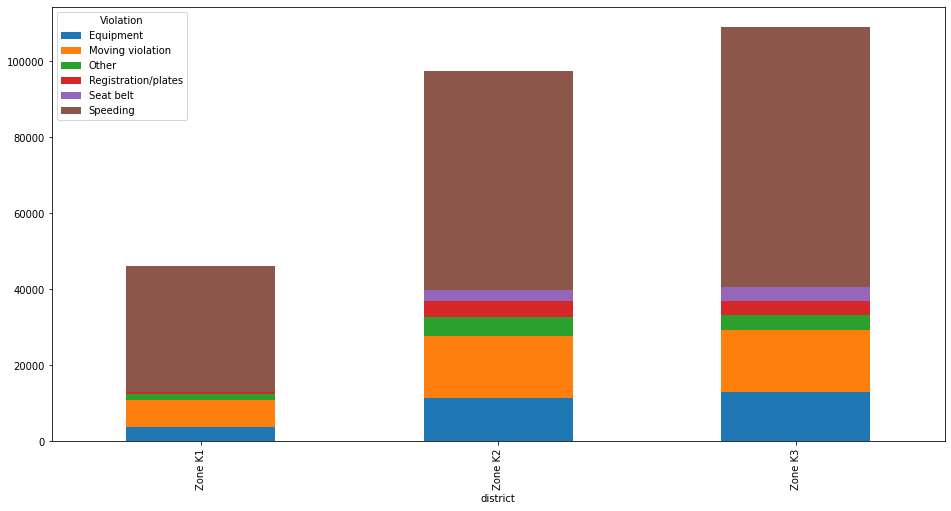

In [40]:
k_zones.plot.bar(figsize=(16,8), stacked=True)
plt.legend(title='Violation');

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [41]:
df["stop_minutes"] = df["stop_duration"].map({'0-15 Min':8,'16-30 Min':23,'30+ Min':45,'1':60,'2':120})

In [42]:
df["stop_minutes"].unique()

array([  8,  23,  45, 120,  60], dtype=int64)

***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [43]:
stop_length = df.groupby("violation_raw")["stop_minutes"].mean()
stop_length

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.455118
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.836558
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589582
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

In [44]:
stop_length.sort_values()

violation_raw
Seatbelt Violation                   9.698236
Speeding                            10.589582
Equipment/Inspection Violation      11.455118
Violation of City/Town Ordinance    13.230695
Registration Violation              13.543268
Other Traffic Violation             13.836558
Special Detail/Directed Patrol      14.876778
Motorist Assist/Courtesy            17.629929
Suspicious Person                   18.374269
APB                                 18.593814
Warrant                             19.769231
Call for Service                    21.963314
Name: stop_minutes, dtype: float64

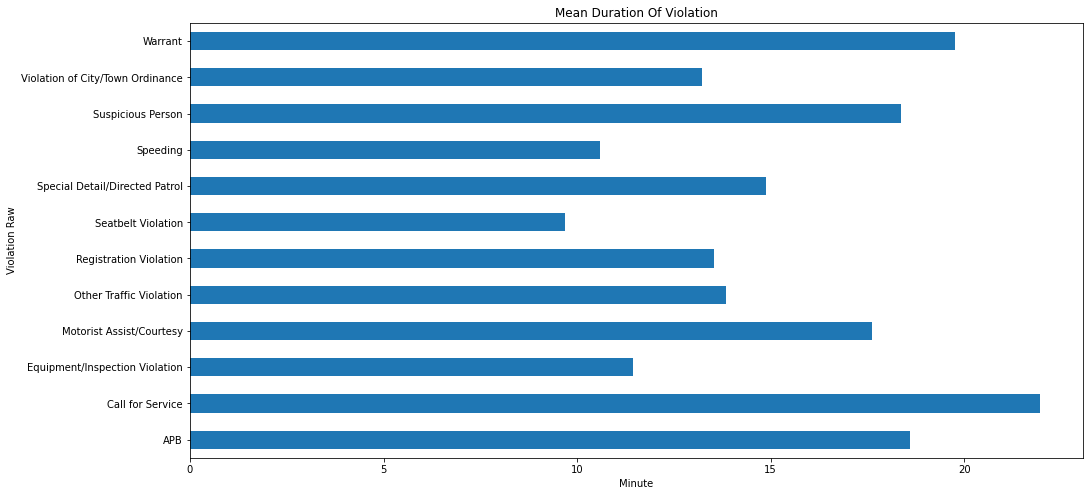

In [45]:
fig, axes = plt.subplots()
stop_length.plot.barh(figsize=(16,8))
axes.set_xlabel("Minute")
axes.set_ylabel("Violation Raw")
axes.set_title("Mean Duration Of Violation");